In [93]:
from PIL import Image
import matplotlib.pyplot as plt
import pytesseract
import cv2

In [94]:
def cv2ToPil(img):
    return Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))  

In [123]:
img = cv2.imread('validateCode.jpeg')
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(grayImg, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
retImg = cv2.medianBlur(thresh, 3)

In [124]:
grayImg = cv2ToPil(grayImg)
thresh = cv2ToPil(thresh)
retImg = cv2ToPil(retImg[2:-2, 2:-2])

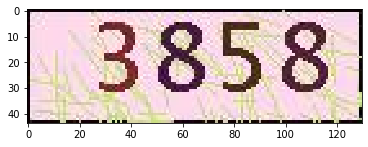

In [125]:
plt.imshow(img)

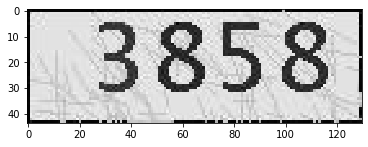

In [126]:
plt.imshow(grayImg)

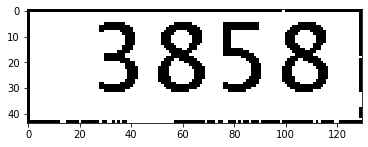

In [127]:
plt.imshow(thresh)

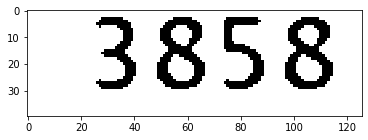

In [128]:
plt.imshow(retImg)

In [130]:
pytesseract.image_to_string(retImg)

'3858'

### 定义函数，添加参数增加识别率

1. 转灰度图
2. 分离图片的前景与背景
3. 过滤噪音
4. 去除边框

In [142]:
def recogVerifCode(imgPath):
    img = cv2.imread(imgPath)
    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(grayImg, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    retImg = cv2.medianBlur(thresh, 3)
    
    verifcodeImg = retImg[2:-2, 2:-2]
    return pytesseract.image_to_string(verifcodeImg, config='--psm 6 --oem 3 -c tessedit_char_whitelist=0123456789')


In [143]:
recogVerifCode('validateCode.jpeg')

'3858'

In [144]:
recogVerifCode('verif_code.jpeg')

'3213'

In [145]:
recogVerifCode('verif_code1.jpeg')

'0465'